## Extreme Gradient Boosting Tutorial - Using XGBRegressor

Peter R., 2023-08-01

### Intro
There are several way to carry our Extreme Gradient Boosting. You could use R or Python.  There are several R packages to do so such as "dismo" and "xgboosting". In Python there are several ways as well. You can do XGB with the sklearn framework and within this framework you can use "xgboost"  train(), XGBClassifier(), XGBRegression() etc.  Here I use XGBRegression().

Here I replicate Jason Brownlee's tutorial (see reference at the end).

#### File and folder path settings

In [ ]:
# Import the os module
import os

# Get the current working directory
cwd = os.getcwd()

print(cwd)

#### Load and explore the data

In [2]:
# load and summarize the housing dataset
from pandas import read_csv
from matplotlib import pyplot
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
# summarize shape
print(dataframe.shape)
# summarize first few lines
print(dataframe.head())

ModuleNotFoundError: No module named 'pandas'

In [7]:
# split data into X and y. NOte: if df you need iloc to subset object
X1 = df1.iloc[:,0:8]
print(X1.head())


   magnitude    age  deciduous  conifers  protected  elevation  precipitation  \
0       -765  56.42       24.7      74.8          0        373            813   
1       -432  34.42       22.7      76.7          0        374            813   
2       -614  53.18       18.5      78.8          0        380           1018   
3       -276  72.76       70.2      29.5          0        454            998   
4       -291  88.82       29.7      30.7          0        167            819   

   temperature  
0         4.40  
1         4.40  
2         5.06  
3         4.22  
4         6.90  


In [8]:
Y1 = df1.iloc[:,8]
print(Y1.head())

# New data
#X2 = evi2[:,0:7]
#Y1 = evi2[:,7]

0    0
1    0
2    0
3    0
4    0
Name: driver_class, dtype: int64


([], [])

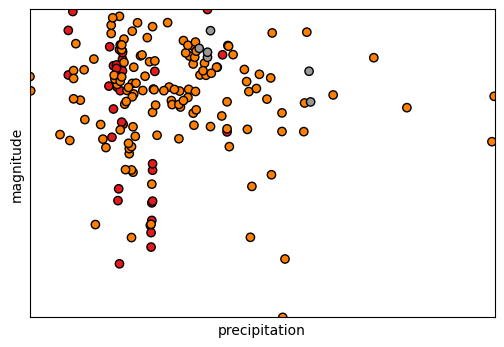

In [9]:
import matplotlib.pyplot as plt

# import some data to play with
X = df1.iloc[:, [6,0]]  # magnitude & prec. When df you need iloc
y = Y1 # driver

x_min, x_max = X.iloc[:, 0].min() - 0.5, X.iloc[:, 0].max() + 0.5
y_min, y_max = X.iloc[:, 1].min() - 0.5, X.iloc[:, 1].max() + 0.5

plt.figure(2, figsize=(6, 4))
plt.clf()

# Plot the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("precipitation")
plt.ylabel("magnitude")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

#### Set up model

In [10]:
# Model 2: uses XGBClassifier for more flexibility. Note: XGBClassifier does not need DMatrix

# Load libraries, modules, etc.
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix

seed = 7 # random seed to help with replication
testsize1 = 0.2 # percent of records to test after training

# Split data set. Note the 'stratify' option
x2_train, x2_test, y2_train, y2_test = train_test_split(X1, Y1, test_size=testsize1, random_state=seed, stratify=y)

print(sum(y2_train)/len(y2_train)) # If stratify worked, values should be the same as below

print(sum(y2_test)/len(y2_test))



0.8273381294964028
0.8


#### Run model

In [11]:
# Model using the XGBClassifier wrapper
# You can't use scale_pos_weight when dealting with multinomial/multiclass data. Only works with binary.
# Note can't use weights to deal with imbalanced data as I did with method 1 (see xgboost_evi_brks_m1_v1)

model_m2 = xgb.XGBClassifier(objective='multi:softmax', seed=seed, eval_metric='aucpr', early_stopping_rounds=10) 
model_m2.fit(x2_train, y2_train, verbose=True, eval_set= [(x2_test, y2_test)])

[0]	validation_0-aucpr:0.61718
[1]	validation_0-aucpr:0.66632
[2]	validation_0-aucpr:0.67090
[3]	validation_0-aucpr:0.67741
[4]	validation_0-aucpr:0.67544
[5]	validation_0-aucpr:0.71241
[6]	validation_0-aucpr:0.70939
[7]	validation_0-aucpr:0.70884
[8]	validation_0-aucpr:0.93846
[9]	validation_0-aucpr:0.93846
[10]	validation_0-aucpr:0.93989
[11]	validation_0-aucpr:0.94103
[12]	validation_0-aucpr:0.94745
[13]	validation_0-aucpr:0.95396
[14]	validation_0-aucpr:0.94971
[15]	validation_0-aucpr:0.95549
[16]	validation_0-aucpr:0.95525
[17]	validation_0-aucpr:0.95324
[18]	validation_0-aucpr:0.95592
[19]	validation_0-aucpr:0.95592
[20]	validation_0-aucpr:0.95592
[21]	validation_0-aucpr:0.95592
[22]	validation_0-aucpr:0.95714
[23]	validation_0-aucpr:0.95714
[24]	validation_0-aucpr:0.95998
[25]	validation_0-aucpr:0.95998
[26]	validation_0-aucpr:0.95998
[27]	validation_0-aucpr:0.95998
[28]	validation_0-aucpr:0.95714
[29]	validation_0-aucpr:0.95714
[30]	validation_0-aucpr:0.95714
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softmax', predictor=None, ...)

#### Fine tunning parameters
Fine tune parameters to find a better model (potentially). Note: This currently does not work becasue of the llow number of fire and insect drivers in my test data

In [12]:
# Fine tune parameters using GridSearchCV. This won't work becasue of the limitation of the data

# Model 3: GridSearch Model but this does not have the same properties as a XGBClassifier() output
param_grid1 = {
'max_depth' : [3,4,5],
'learning_rate': [0.1, 0.01, 0.05],
'gamma': [0, 0.25, 1.0],
'reg_lambda': [0, 1.0, 10.0],
}


# grid_search is my new model
# subsample is for running the model faster
model_gs = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='multi:softmax', seed=seed, eval_metric='aucpr', subsample=0.9,  colsample_bytree=0.5) ,
    param_grid=param_grid1,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 3, #Can't be bigger than the number of records per group. These seem to be the folds
    verbose=True
)

model_gs.fit(x2_train, y2_train)



Fitting 3 folds for each of 81 candidates, totalling 243 fits


C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='aucpr', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softmax', predictor=None, ...),
             n_jobs=10,
             param_grid={'gamma': [0, 0.25, 1.0],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5], 'reg_lambda': [0, 1.0, 10.0]},
             scoring='roc_auc', verbose=True)

In [2]:
# Best parameters
# model_gs.best_estimator

#### Predictions
Now let's se how well the mdoels can predict

In [17]:
# Predcitions using the test data
predictions2 = model_m2.predict(x2_test)
print(predictions2)

[1 1 1 1 1 1 1 2 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 2 1 2 1 1]


In [25]:
model_m2.predict(x2_test, ntree_limit=model_m2.best_ntree_limit)

C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1])

In [16]:
# Predcitions using the test data using the GridSearch Model
predictions_gs = model_gs.predict(x2_test)
print(predictions_gs)

[1 1 1 1 1 1 1 2 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1]


In [178]:
# Not run yet.
#Prediction using brand new test data. That is, data not seen by the model yet (not initial train or test data)
#predictionsNew = model.predict(testNewData)
#print(predictionsNew)

#### Model accuracy
Let's measure the accuracy of the models

In [20]:
# Accuracy score
from sklearn.metrics import accuracy_score #0.9142857142857143

print('model_m2:', accuracy_score(y2_test, predictions2))
print('model_gs:', accuracy_score(y2_test, predictions_gs)) 

model_m2: 0.9142857142857143
model_gs: 0.9428571428571428


In [21]:
# Cross-Validation model - Does not work yet because of limitation of my test dataset
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10) #(... , random_state=seed, shuffle=True)
results = cross_val_score(model_m2, X1, Y1, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\xgboost\sklearn.py", line 1490, in fit
    self._Booster = train(
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\xgboost\training.py", line 186, in train
    if cb_container.after_iteration(bst, i, dtrain, evals):
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\xgboost\callback.py", line 247, in after_iteration
    ret = any(c.after_iteration(model, epoch, self.history)
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\xgboost\callback.py", line 247, in <genexpr>
    ret = any(c.after_iteration(model, epoch, self.history)
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\xgboost\callback.py", line 412, in after_iteration
    assert len(evals_log.keys()) >= 1, msg
AssertionError: Must have at least 1 validation dataset for early stopping.

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\xgboost\sklearn.py", line 1490, in fit
    self._Booster = train(
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\xgboost\training.py", line 180, in train
    bst = cb_container.before_training(bst)
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\xgboost\callback.py", line 148, in before_training
    model = c.before_training(model=model)
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\xgboost\callback.py", line 350, in before_training
    self.starting_round = model.num_boosted_rounds()
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\xgboost\core.py", line 2466, in num_boosted_rounds
    _check_call(_LIB.XGBoosterBoostedRounds(self.handle, ctypes.byref(rounds)))
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: value 0 for Parameter num_class should be greater equal to 1
num_class: Number of output class in the multi-class classification.


In [22]:
# Cross-Validation model - Does not work yet because of limitation of my test dataset
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10) #(... , random_state=seed, shuffle=True)
results = cross_val_score(model_gs, X1, Y1, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Fitting 3 folds for each of 81 candidates, totalling 243 fits


C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\sklearn\metrics\_scorer.py", line 373, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-package

Fitting 3 folds for each of 81 candidates, totalling 243 fits


C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\sklearn\metrics\_scorer.py", line 373, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-package

Fitting 3 folds for each of 81 candidates, totalling 243 fits


C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\sklearn\metrics\_scorer.py", line 373, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-package

Fitting 3 folds for each of 81 candidates, totalling 243 fits


C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\sklearn\metrics\_scorer.py", line 373, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-package

Fitting 3 folds for each of 81 candidates, totalling 243 fits


C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\sklearn\metrics\_scorer.py", line 373, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-package

Fitting 3 folds for each of 81 candidates, totalling 243 fits


C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\sklearn\metrics\_scorer.py", line 373, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-package

Fitting 3 folds for each of 81 candidates, totalling 243 fits


C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\sklearn\metrics\_scorer.py", line 373, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-package

Fitting 3 folds for each of 81 candidates, totalling 243 fits


C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\sklearn\metrics\_scorer.py", line 373, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-package

Fitting 3 folds for each of 81 candidates, totalling 243 fits


C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\sklearn\metrics\_scorer.py", line 373, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-package

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Accuracy: nan% (nan%)


C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\sklearn\model_selection\_search.py", line 874, in fit
    self._run_search(evaluate_candidates)
  File "C:\Users\Peter R\anaconda3\envs\xgboost1\lib\site-packages\sklearn\model_selection\_search.py", line 1388, in

#### Model plots

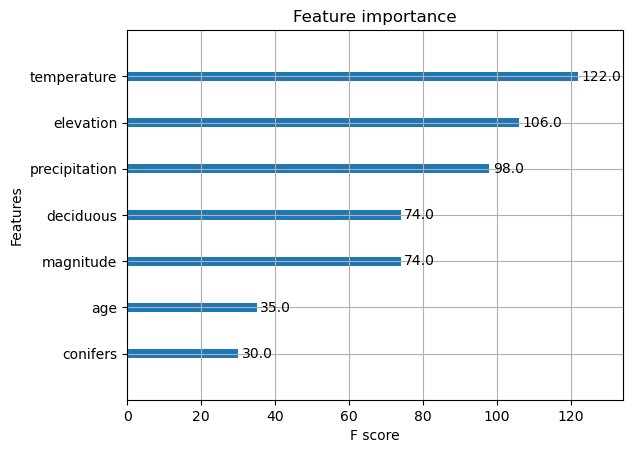

In [23]:
#import xgboost as xgb
# Model m2
# feature importance. Error: 'XGBClassifier' object has no attribute 'get_score'

#print(model_m2.get_fscore(importance_type='gain'))

xgb.plot_importance(model_m2, max_num_features=10)
plt.show()


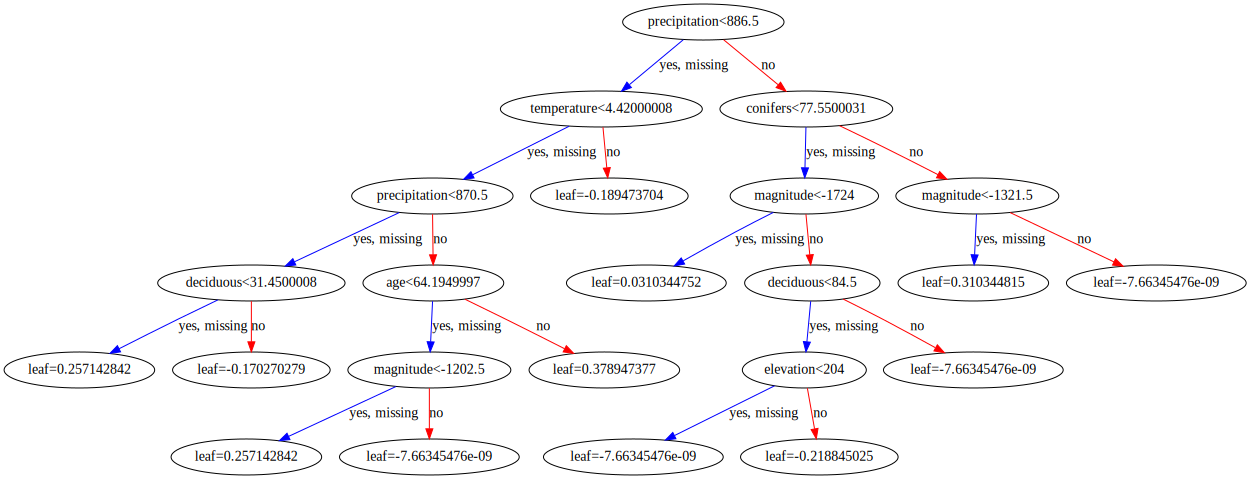

In [24]:
# Plot tree. (Note: I havd to install graphviz from the conda cmd line) #, rankdir='LR'
import graphviz

#fig, ax = plt.subplots(figsize=(8, 6)) #plt.figure(2, figsize=(8, 6))
#xgb.plot_tree(model, num_trees=4)

xgb.to_graphviz(model_m2)


In [26]:
# save in JSON format
model_m2.save_model("model_m2.json")
# save in text format
#model_m2.save_model("model_m2.txt")


In [ ]:
# load saved model
#model2 = xgb.XGBClassifier()
#model2.load_model("model_m2.json")


#### References

See tutorials:

https://www.youtube.com/watch?v=OQKQHNCVf5k

https://www.youtube.com/watch?v=GrJP9FLV3FE&t=2167s

https://datascience.stackexchange.com/questions/16342/unbalanced-multiclass-data-with-xgboost

https://mljar.com/blog/xgboost-save-load-python/

https://machinelearningmastery.com/xgboost-for-regression/
